# Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information: 
* Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (000)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

# Objective: 
The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [120]:
# My Dependent Variable is "Personal Loan"

# I will be trying to predict if they accept an offer for a personal loan

# The Independent Variables will factor into the model to help me determine the likelihood 

# Table of Contents
- <a href = #link1>Import Libraries and Load Dataset </a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split Data into Training and Test</a>


- <a href = #link4>Use Logistic Regression to Predict Target Variable</a> 


- <a href = #link5>Analyze the Coefficients</a>


- <a href = #link6>Conclusion and Business Insights</a>

# <a id = "link1"></a> 1. Import Libraries and Load Dataset
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [121]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

### Load Dataset

In [122]:
# Load the dataset into a dataframe and check the first 5 rows
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


#### Insights
* The data is already fairly clean at first glance. 
* We have a good variety of columns with different kinds of information, some numeric and some categorical. 

### Check Shape

In [123]:
# Check the shape to understand the number of rows and columns
df.shape

(5000, 14)

#### Insights
* There are 5,000 rows of data
* There are 14 columns of data
* This should be plenty of records and independent variables to perform logistic regression analysis

### Check Data Types

In [124]:
# Check Data Types
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [125]:
# Convert categorical columns to data type "category" instead of "int64"
df['ZIP Code'] = df['ZIP Code'].astype('str')
df['Family'] = df['Family'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [126]:
# Import CategoricalDtype so I can set the order or the Education Level column values
from pandas.api.types import CategoricalDtype

# Replace the number values with the text-based category for ease of reading later
df.replace({'Education': {1: "Undergrad", 2: "Graduate", 3: "Advanced/Professional"}}, inplace=True)

# Change Education to category data type and set the correct order
ed_cat = CategoricalDtype(categories=["Undergrad", "Graduate", "Advanced/Professional"], ordered=True)
df['Education'] = df['Education'].astype(ed_cat)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,Graduate,0,0,0,0,0,1


#### Insights
* All of the columns had a numeric data type. 
* I corrected this for categorical columns. 
* I changed Zip Code to str so I can confirm each value is 5 digits long later.
* I changed the Education numbers to the corresponding nominal labels
* I took an extra step to convert Education to ordinal since that might be relevant later. 

### Check Statistical Summary

In [127]:
# Review the statistical summary (transpose so it's easier to read)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00


#### Insights
* Age has a fairly wide range, 23 to 67, but that might be a good representation of the customer base. 
* The minimum in the Experience column is a negative, so something must be wrong with the values that needs to be corrected -- you can't have negative years experience. There is also a pretty wide range of years experience. 
* Income has a large range with some very low values and some very high values. The mean is greater than the median, so the data in this column likely skews right. 
* Family size has a unexpectedly small range (1 to 4). There aren't any outliers in this column. 
* CCAvg also seems to skew right with the median at 1,500 per month, the mean at 1,940 per month and the max at 10,000 per month!
* Mortgage needs a closer look. It has a strong right skew. The median is 0, the max is 635,000, and the mean is only 56,500. Need to understand how many people actually have a mortgage and if this column is valuable. 

### Check for Null Values

In [128]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   object  
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5), object(1)
memory usage: 308.5+ KB


#### Insights
* We do not have any Null values in the dataset.
* We do have some zero values, but they are appropriate for the column and don't need to be changed. 
* There might still be some bad data in some of the columns, so I need to check and fix those. 

### Fix Bad Data and Drop Unnecessary Data

In [130]:
# Check to see if all ZIP Code values have 5 digits
df.loc[df['ZIP Code'].str.len() != 5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.60,Advanced/Professional,0,0,0,0,1,1


In [131]:
# Find the mode so I can use it to replace the bad ZIP Code value
df['ZIP Code'].mode()[0]

'94720'

In [132]:
# Replace the bad ZIP Code with the mode 
df.replace({'ZIP Code': "9307"}, "94720", inplace=True)

In [133]:
# Check for negative values in the Experience column
# Group by age to see where they occur
df[df['Experience'] < 0].groupby(['Age'])['Experience'].value_counts()

Age  Experience
23   -1             6
     -2             4
     -3             2
24   -2             9
     -1             6
     -3             2
25   -1            17
     -2             1
26   -1             1
28   -2             1
29   -1             3
Name: Experience, dtype: int64

In [134]:
# All people with negative experience values are under 30 years old. 

# Find the measures of central tendency of Experience column
# for people under 30 who do not have a negative value.
# I'm restricting to under 30 because all negative values are people under 30
# and it seems most appropriate to use a value from similarly aged people
# because experience generally increases with age. 

Ex_mode = df[(df['Experience'] >= 0) & (df['Age'] < 30)]['Experience'].mode()[0]
Ex_median = df[(df['Experience'] >= 0) & (df['Age'] < 30)]['Experience'].median()
Ex_mean = df[(df['Experience'] >= 0) & (df['Age'] < 30)]['Experience'].mean()

print("For people under age 30:")
print("Mode is ", Ex_mode)
print("Median is ", Ex_median)
print("Mean is ", Ex_mean)

For people under age 30:
Mode is  3
Median is  3.0
Mean is  2.376146788990826


In [135]:
# The mode of the Experience for people under 30 feels most appropriate

# Replace the negative values in Experience with the mode of the Experience for people under 30
df.replace({'Experience': {-1: 3, -2: 3, -3: 3}}, inplace=True)

#### Insights
* We had one ZIP Code which was not a valid ZIP Code. I replaced it with the mode.  
* We had 52 negative values for Experience, which is not logical. I discovered that those negative values all occured with people under 30. Age and Experience tend to be directly related, so I chose to replace the negative values with the mode of Experience from similarly aged people (under-30). 

# <a id = "link2"></a> 2. EDA
Study the data distribution in each attribute and target variable, share your findings (20 marks)
* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

### Unique Values

In [136]:
# Count the number of unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               466
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [137]:
# Drop the ID column as it will map 1:1 anyways
df2 = df.drop('ID', axis = 1)

# Drop the ZIP Code column (first model run showed it did not have significant contribution, and it adds a lot of columns when we get dummies)
df2.drop('ZIP Code', axis = 1, inplace=True)

In [138]:
df2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.60,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.50,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.00,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.70,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.00,Graduate,0,0,0,0,0,1


#### Insights
* Each value in the ID column was unique. I dropped it because it will map 1:1 anyways.
* ***I used ZIP Code in a previous run of the model and it added very little value, so I'm dropping it here to see if it improves the model performance.*** 
* Looks like our values for Age are OK because the unique values fit within the range.
* All other columns look OK -- number of unique values is within reason for what I'd expect to see for each. 

### Number of People with Zero Mortgage

In [139]:
# Check how many people have 0 Mortgage
df2[df2['Mortgage'] == 0].shape[0]

3462

In [140]:
# Check to see how skewed the Mortgage data are
df2['Mortgage'].value_counts(normalize=True)

0     0.69
98    0.00
103   0.00
119   0.00
83    0.00
      ... 
541   0.00
509   0.00
505   0.00
485   0.00
577   0.00
Name: Mortgage, Length: 347, dtype: float64

In [141]:
df2.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,45.34,20.15,73.77,1.94,56.50
std,11.46,11.39,46.03,1.75,101.71
min,23.00,0.00,8.00,0.00,0.00
25%,35.00,10.00,39.00,0.70,0.00
50%,45.00,20.00,64.00,1.50,0.00
75%,55.00,30.00,98.00,2.50,101.00
max,67.00,43.00,224.00,10.00,635.00


#### Insights
* 69% of the people did not have a mortgage
* Althought this has a strong skew, I chose to keep this column because I feel it might be an important attribute for the model

### Number of People with Zero CC Spending Each Month

In [142]:
# Check how many people have 0 average credit card spending each month
df2[df2['CCAvg'] == 0].shape[0]

106

In [143]:
# Check to see how skewed the CCAvg data are
df2['CCAvg'].value_counts(normalize=True)

0.30   0.05
1.00   0.05
0.20   0.04
2.00   0.04
0.80   0.04
       ... 
2.75   0.00
8.20   0.00
9.30   0.00
3.67   0.00
5.33   0.00
Name: CCAvg, Length: 108, dtype: float64

#### Insights
* I'm choosing to keep the CCAvg column because the number of people with zero average spending is low

### Value Counts of All Categorical Columns

In [144]:
# Check value counts of all category type columns
for i in list(df2.columns[df2.dtypes == 'category']):   
    print(df2[i].value_counts(normalize=True))
    print()

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

Undergrad               0.42
Advanced/Professional   0.30
Graduate                0.28
Name: Education, dtype: float64

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64



#### Insights
* The distribution of Family size and Education level are both fairly even 
* Few people in this dataset have personal loans, securities accounts, or CDs (10% or less for each) 
* More people use internet banking services and have credit cards, but each is still less than 50%

### Univariate Analysis

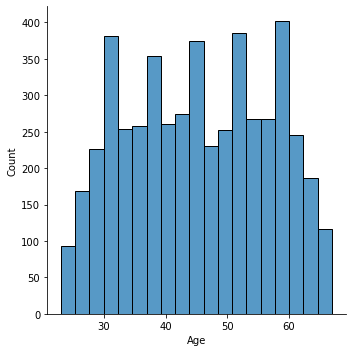

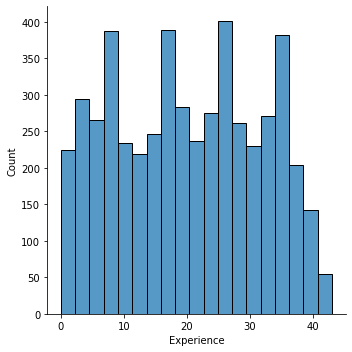

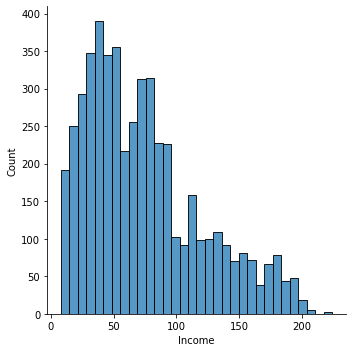

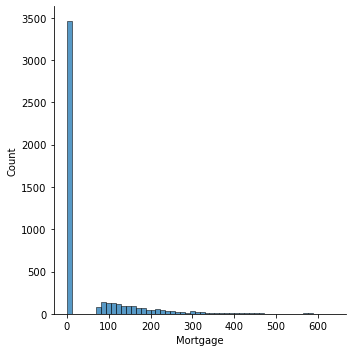

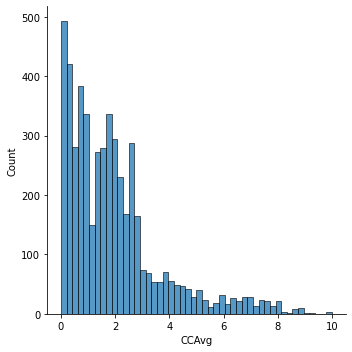

In [145]:
# Create a displot for each continous column
for i in ['Age','Experience','Income','Mortgage','CCAvg']:
    sns.displot(df2[i])
    plt.show()

#### Insights
* Income and CCAvg are skewed, but Age and Experience are not. 
* CCAvg is the most skewed
* Age and Experience have some unusual peaks in what seems like a pattern, but there doesn't seem to be a logical explanation. 

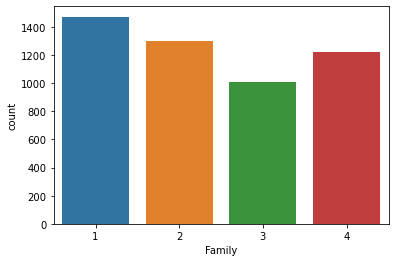

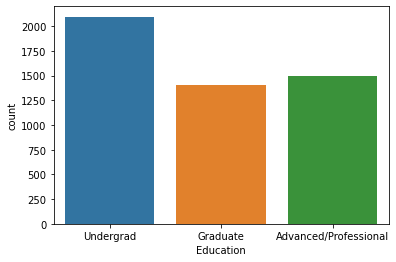

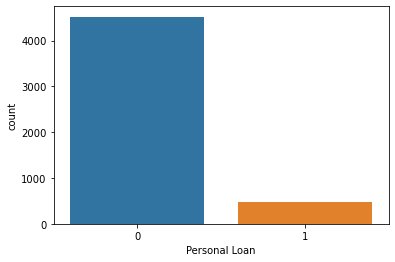

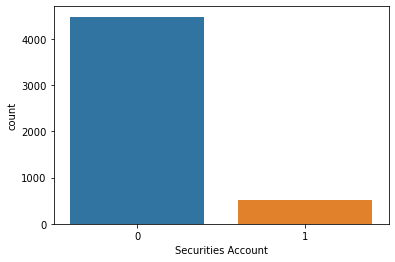

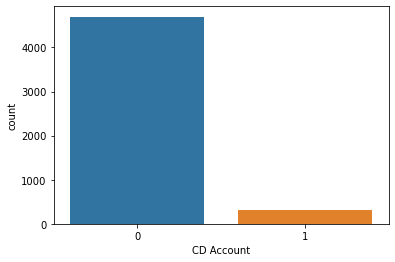

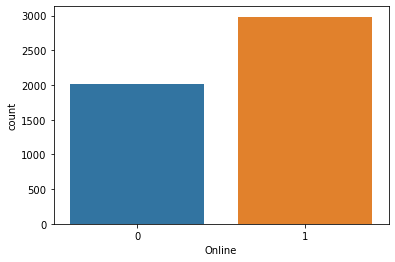

In [146]:
# Create a countplot for each category and object column
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online']:
    sns.countplot(x = i, data = df2)
    plt.show()

### Bivariate Analysis

In [147]:
# Check mean values for customers who accepted the Personal Loan
df2.groupby(['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.37,20.18,66.24,1.73,51.79
1,45.07,19.84,144.75,3.91,100.85


In [148]:
# Check mean values for customers who accepted the Personal Loan
df2.groupby(['Personal Loan']).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.00,20.00,59.00,1.40,0.00
1,45.00,20.00,142.50,3.80,0.00


#### Insights
* No significant difference in Age and Experience
* Income is higher for customers who accepted the Personal Loan offer
* Average monthly credit card spending is also higher for customers who accepted

In [149]:
# Compare Personal Loan acceptance to Family Size
pd.crosstab(df2['Family'], df2['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


#### Insights
* It appears people with larger families accepted the Personal Loan offer more than people with smaller families.

In [150]:
# Compare Personal Loan acceptance to Education Level
pd.crosstab(df2['Education'], df2['Personal Loan'], normalize='index')

Personal Loan,0,1
Education,,
Undergrad,0.96,0.04
Graduate,0.87,0.13
Advanced/Professional,0.86,0.14


#### Insights
* It appears people with more education accepted the Personal Loan offer more than people with less education.

In [151]:
# Compare Personal Loan acceptance to Securities Account owners
pd.crosstab(df2['Securities Account'], df2['Personal Loan'], normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.91,0.09
1,0.89,0.11


#### Insights
* Very small increase in Personal Loan acceptance among Securities Account owners. Might not be significant. 

In [152]:
# Compare Personal Loan acceptance to CD Account owners
pd.crosstab(df2['CD Account'], df2['Personal Loan'], normalize='index')

Personal Loan,0,1
CD Account,,
0,0.93,0.07
1,0.54,0.46


#### Insights
* Customers with a CD Account accepted the personal loan offer a lot more

In [153]:
# Compare Personal Loan acceptance to Online services users 
pd.crosstab(df2['Online'], df2['Personal Loan'], normalize='index')

Personal Loan,0,1
Online,,
0,0.91,0.09
1,0.90,0.10


#### Insights
* No significant difference with Online account services users

### Prepare Data for the Model

In [154]:
# Define X and Y variables
X = df2.drop('Personal Loan', axis=1)
Y = df2['Personal Loan']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Graduate,Education_Advanced/Professional,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.60,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.50,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.00,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.70,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.00,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.90,0,0,0,0,0,1,0,0,1,0
4996,30,4,15,0.40,85,0,0,1,0,0,0,0,1,0
4997,63,39,24,0.30,0,1,0,0,0,1,0,0,0,0
4998,65,40,49,0.50,0,0,1,0,1,0,0,0,1,0


# <a id = "link3"></a> 3. Split Data into Training and Test
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [155]:
# Split data into training and test 
# Set using a 70:30 ratio
# Set a locked random state so it doesn't shuffle the data with re-runs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4)

In [156]:
y_train.value_counts()

0    3168
1     332
Name: Personal Loan, dtype: int64

In [157]:
y_test.value_counts()

0    1352
1     148
Name: Personal Loan, dtype: int64

#### Insights
* Train and test have a similar distribution of values between 0 and 1, which is good

# <a id = "link4"></a> 4. Use Logistic Regression to Predict Target Variable
Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [158]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Import metrics libraries to evaluate model performance after testing
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [159]:
# Fit the model to the training data
# I received a convergence error using lbfgs (default)
# I tried increasing the max_iter, but that actually lowered the Recall
# So I set the solver to 'liblinear' because it's a small dataset
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [160]:
# Use the model to predict whether the customer will take a personal loan using the test data
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

### Evaluate Model Performance

In [161]:
# Print the key model performance evaluation metrics
print("Training Accuracy",model.score(X_train,y_train))  
print()
print("Testing Accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,model.predict_proba(X_test)[:,1] ))

Training Accuracy 0.9582857142857143

Testing Accuracy 0.9593333333333334

Recall: 0.6283783783783784

Precision: 0.9393939393939394

F1 Score: 0.7530364372469636

Roc Auc Score: 0.9615134735327043


#### Insights
* Accuracy is very high and consistent between Training and Test
* Recall is low, which means my model is missing people who would actually accept a personal loan offer. This means my model is not very good. 
* Precision is very high
* F1 Score is not as high, because Recall is low
* Roc Auc Score is very high, which normally indicates a good model. But I think that is being influenced by the fact that most people do not accept the personal loan offer (similar to the issue with predicting terrorists in an airport). It's generally an uncommon outcome, so my model will look good even though the Recall is not good.

### Confusion Matrix

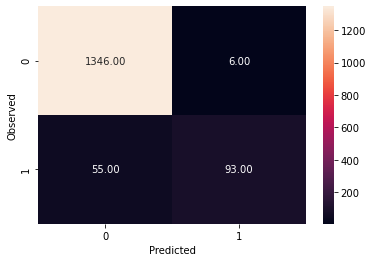

In [162]:
# Define a function to create a confusion matrix 
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test,y_predict)

#### Insights
* TP = 93 ... Predicted a customer would accept personal loan and did
* FP = 6 ... Predicted a customer would accept personal loan but they did not
* TN = 1346 ... Predicted the customer would not accept a personal loan offer and they did not
* FN = 55 ... Predicted the customer would not accept a personal loan offer, but they did. 
* The number of false negatives is high. This is what's driving my low Recall score. 
* The model is lacking sensitivity to accurately identify people who would accept a personal loan offer. 
* This is a big problem because the lack of sensitivity means the model would miss offering a personal loan to around 40% of the customers who would have said yes to it. 

# <a id = "link5"></a> 5. Analyze the Coefficients
Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

### Attribute Coefficients

In [166]:
# Create a dataframe to show the coefficients of each attirbute
coeff = pd.DataFrame()
coeff['Col'] = X_train.columns
coeff['Coeff'] = np.round(abs(model.coef_[0]),2) 
coeff.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_Advanced/Professional,3.55
8,Education_Graduate,3.45
11,CD Account_1,2.63
6,Family_3,1.46
7,Family_4,1.29
13,CreditCard_1,0.84
12,Online_1,0.66
10,Securities Account_1,0.51
1,Experience,0.34
0,Age,0.33


#### Insights
* Top 5 features that influence the model's output are: Advanced/Professional education level, Graduate education level, owning a CD account, having a family of 3, and having a family of 4. 
* Income seems to have the least contribution to helping the model predict the target variable. 
* Average monthly credit care spending, age, experience, and having a family of 2 also seem to have little contribution to the model. 
* Mortgage has little to no contribution to the model

### Wrong Predicitons

In [164]:
# Add the predicted and observed classes in a dataframe 
df3 = X_test.copy()
df3['Observed Personal Loan'] = y_test
df3['Predicted Personal Loan'] = y_predict

# Filter to show rows where prediciton was wrong
fpfn = df3[((df3['Observed Personal Loan'] == 1) & (df3['Predicted Personal Loan'] == 0))
   | ((df3['Observed Personal Loan'] == 0) & (df3['Predicted Personal Loan'] == 1))]
fpfn

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Graduate,Education_Advanced/Professional,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
4565,33,8,120,4.20,76,1,0,0,0,1,0,0,0,1,1,0
3573,60,36,165,5.60,0,0,1,0,0,0,0,0,0,1,1,0
2539,32,7,98,4.20,171,0,0,0,0,0,1,1,0,0,1,0
1407,63,39,101,3.90,294,1,0,0,0,1,0,0,1,0,1,0
2194,34,9,123,1.60,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,29,3,148,4.10,0,0,1,0,0,0,0,0,1,0,1,0
4357,39,14,141,6.30,0,0,0,1,0,0,1,1,1,1,1,0
2996,42,18,103,3.33,0,0,0,0,0,0,1,1,1,1,1,0
3383,46,22,135,4.10,213,0,1,0,0,0,0,0,1,0,1,0


# <a id = "link6"></a> 6. Conclusion and Insights
Give conclusion related to the Business understanding of your model? (5 marks)

In this situation the cost of a False Positive is relatively low. It would mean sending an email or some other offer to a customer who says no to it. This means Precision is **not** the most important factor in the model performance. 

The cost of a False Negative, however is high in terms of opportunity cost. Every FN represents a customer who would have accepted a personal loan offer had they received one, but was not given an offer because it was predicted they would say no. This means that **Recall is the most important performance metric.**

Overall, this is not a great model because the Recall is relatively low. I tried to re-run it several times and change some things, but couldn't improve it significantly. I'm assuming there are things that need to be done that I haven't learned yet (at least I hope!). I also think the fact that the target variable is so skewed might be a factor in why Recall is so low. 